# **Business Problem Understanding**

**Context**

Perusahaan travel asuransi adalah perusahaan yang menyediakan layanan asuransi perjalanan kepada pelanggan. Mereka menawarkan berbagai jenis polis asuransi yang mencakup perlindungan terhadap kerugian atau risiko yang terkait dengan perjalanan seperti pembatalan perjalanan, keterlambatan penerbangan, kehilangan bagasi, atau kecelakaan selama perjalanan. Salah satu tantangan yang dihadapi oleh perusahaan adalah mengelola klaim asuransi dengan baik dan meminimalkan penyalahgunaan klaim yang tidak sah. 
Ketika seorang pelanggan mengajukan klaim, perusahaan harus melakukan pengecekan dan verifikasi yang memakan waktu dan sumber daya. Jika klaim tidak valid atau disengaja, perusahaan harus menanggung kerugian finansial dan reputasi yang dapat berdampak negatif pada bisnis mereka.

**Target :**

No : Tidak mengajukan klaim asuransi

Yes : Mengajukan klaim asuransi

**Problem Statement**

Perusahaan travel asuransi menghadapi tantangan dalam mengelola klaim asuransi dengan baik dan meminimalkan penyalahgunaan klaim yang tidak sah. Proses pengecekan dan verifikasi klaim yang memakan waktu dan sumber daya dapat mengakibatkan kerugian finansial dan reputasi yang merugikan perusahaan. Selain itu, ada risiko kesalahan dalam memprediksi pelanggan yang benar-benar mengajukan klaim, yang dapat mengakibatkan pelanggan yang berhak mendapatkan klaim tidak mendapatkannya.

**Goals**

Perusahaan travel insurance memiliki keinginan untuk memiliki kemampuan dalam memprediksi apakah calon pemegang polis akan mengajukan klaim atau tidak. Hal ini bertujuan untuk menghindari kerugian finansial bagi perusahaan dengan memastikan bahwa calon pemegang polis yang dipilih kemungkinan besar tidak akan mengajukan klaim.

**Analytic Approach**

- Mengumpulkan Data: Mengumpulkan informasi klaim asuransi yang relevan.
- Menyusun Data: Membersihkan dan mengatur data agar mudah dianalisis.
- Mengembangkan Informasi: Menemukan pola dan informasi penting dari data yang ada.
- Memilih Pendekatan: Memilih metode yang tepat untuk memprediksi perilaku klaim.
- Melatih Model: Melatih model menggunakan data yang telah disiapkan.
- Menilai Kinerja: Mengevaluasi sejauh mana model dapat mengidentifikasi klaim dengan benar.
- Mengoptimalkan Model: Mengubah model agar lebih baik dalam mengenali klaim yang benar.

**Metric Evaluation**

Type 1 Error (False Positive) 

Model memprediksi bahwa seorang pelanggan akan mengajukan klaim (Claim = Yes), padahal sebenarnya pelanggan tersebut tidak mengajukan klaim (Claim = No)

Type 2 Error (False Negative)

Model memprediksi bahwa seorang pelanggan tidak akan mengajukan klaim (Claim = No), padahal pelanggan tersebut sebenarnya mengajukan klaim (Claim = Yes)

Dengan memilih F2 Score sebagai metric evaluasi, perusahaan akan dapat menilai sejauh mana model mereka efektif dalam mengenali pelanggan yang benar-benar mengajukan klaim asuransi dengan lebih fokus pada recall. Tujuan utama adalah meminimalkan false negatives (Type 2 Error) agar sebanyak mungkin pelanggan yang berhak mendapatkan klaim dapat terdeteksi dengan benar.

In [13]:
# Library
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import missingno
import sklearn

# Data Split
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_validate,RandomizedSearchCV,StratifiedKFold,KFold

# Preporcessing
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

# Resampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# function untuk scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import KBinsDiscretizer

# modeling
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.linear_model import LinearRegression , Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor


# Metric
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.metrics import precision_score,recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve, PrecisionRecallDisplay, RocCurveDisplay, auc
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error,fbeta_score

# Ensemble various type (modeling)
from sklearn.ensemble import VotingClassifier, StackingClassifier

# Ensemble similiar type(modeling)
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier # Bagging
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier # Boosting
from xgboost.sklearn import XGBClassifier
import lightgbm as lgb

# Save Model
import pickle

In [14]:
df = pd.read_csv('data_travel_insurance.csv')
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


* Agency: Nama agensi travel insurance.
* Agency Type: Jenis agensi travel insurance.
* Distribution Channel: Saluran distribusi agensi travel insurance (misalnya, online atau offline).
* Product Name: Nama produk travel insurance.
* Gender: Jenis kelamin yang diasuransikan.
* Duration: Durasi perjalanan yang diasuransikan.
* Destination: Tujuan perjalanan.
* Net Sales: Jumlah penjualan dari kebijakan travel insurance.
* Commission (in value): Komisi yang diterima oleh agensi travel insurance.
* Age: Usia yang diasuransikan.
* Claim: Status klaim. (Ya atau Tidak)

# **DATA UNDERSTANDING**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


In [16]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Agency,object,0,0.00,16,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, SSI, RAB, ..."
1,Agency Type,object,0,0.00,2,"[Airlines, Travel Agency]"
2,Distribution Channel,object,0,0.00,2,"[Online, Offline]"
3,Product Name,object,0,0.00,26,"[Annual Silver Plan, Cancellation Plan, Basic ..."
4,Gender,object,31647,71.39,2,"[F, nan, M]"
5,Duration,int64,0,0.00,437,"[365, 4, 19, 20, 8, 2, 25, 90, 24, 43, 103, 37..."
6,Destination,object,0,0.00,138,"[SINGAPORE, MALAYSIA, INDIA, UNITED STATES, KO..."
7,Net Sales,float64,0,0.00,1006,"[216.0, 10.0, 22.0, 112.0, 16.0, 50.0, 78.0, 8..."
8,Commision (in value),float64,0,0.00,915,"[54.0, 0.0, 7.7, 4.0, 9.1, 63.21, 10.5, 11.88,..."
9,Age,int64,0,0.00,89,"[57, 33, 26, 59, 28, 36, 22, 39, 27, 48, 43, 5..."


In [17]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [18]:
df.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Gender                  31647
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Age                         0
Claim                       0
dtype: int64

In [19]:
df.isna().sum()/len(df)*100

Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Gender                  71.392799
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision (in value)     0.000000
Age                      0.000000
Claim                    0.000000
dtype: float64

In [20]:
df.duplicated().sum()

4667

In [21]:
df['Claim'].value_counts()

No     43651
Yes      677
Name: Claim, dtype: int64

Dari proses data understanding diatas kita bisa menyimpulkan bahwa :
- Data mempunyai `44328 baris dan 11 columns`
- Terdapat anomali pada numercial column dimana kolom `Duration` mempunyai nilai terendah `-1`, kolom `Age` mempunyai nilai terendah `0`, kolom `Net Sales` mempunyai nilai terendah `-357.500000`
- Terdapat missing value dalam kolom Gender sebanyak `31647` atau sekitar `71.392799%` dari total keseluruhan kolom Gender
- Terdapat data duplikat sebanyak `4667` data
- Terdapat ketidakseimbangan data atau `imbalance` pada Kolom Claim yang ingin dijadikan sebagai target

# **DATA CLEANING**

Terdapat Missing Value di kolom Gender dimana jumlahnya yang cukup banyak sekitar 71% dari total keseluruhan kolom Gender. Karena jumlah ini cukup banyak maka kita akan drop kolom Gender secara keseluruhan

In [22]:
df.drop(['Gender'],axis=1, inplace=True)

Selanjutnya kita akan drop data duplikat yang terdapat pada data agar nanti tidak terjadi model yang tidak akurat diakibatkan adanya duplikat

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.duplicated().sum()

0

In [25]:
df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,No


**Handling Anomaly**

Selanjutnya kita akan melakukan penanganan terhadap kolom numeric yaitu kolom Duration, Age dan Net Sales

Menurut sumber yang saya peroleh dari https://www.allianztravelinsurance.com/ dan https://www.worldnomads.com/ Durasi dari asuransi perjalanan dibagi menjadi 3:

- Perjalanan Singkat: Biasanya, perjalanan singkat memiliki durasi antara 1 hingga 30 hari. Rentang ini cocok untuk liburan pendek atau perjalanan bisnis singkat.

- Perjalanan Menengah: Perjalanan dengan durasi menengah biasanya berkisar antara 1 hingga 90 hari. Rentang ini dapat digunakan untuk perjalanan liburan yang lebih lama atau perjalanan bisnis dengan waktu yang lebih fleksibel.

- Perjalanan Panjang: Untuk perjalanan yang lebih lama, seperti perjalanan studi atau perjalanan jangka panjang, durasinya dapat mencapai beberapa bulan atau bahkan lebih dari satu tahun.

Dari sini kita bisa asumsikan bahwa durasi paling pendek adalah 1 hari dan durasi paling panjang adalah 1 tahun(365 hari). Dan jika asuransi lebih dari satu tahun maka harus melakukan renewal terhadap durasi dari asuransi tersebut. Maka pada kasus ini kita bisa ambil range 1 tahun dalam durasi asuransi

In [26]:
df[df["Duration"] > 365]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
13,C2B,Airlines,Online,Annual Silver Plan,376,SINGAPORE,252.85,63.21,43,Yes
50,LWC,Travel Agency,Online,Annual Travel Protect Gold,370,CHINA,204.60,132.99,39,Yes
53,C2B,Airlines,Online,Annual Silver Plan,366,SINGAPORE,216.00,54.00,37,No
87,SSI,Airlines,Online,Ticket Protector,4736,SINGAPORE,0.32,0.09,48,No
116,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,430,AUSTRALIA,-59.40,35.64,41,No
...,...,...,...,...,...,...,...,...,...,...
44142,C2B,Airlines,Online,Annual Silver Plan,400,SINGAPORE,252.85,63.21,30,No
44210,C2B,Airlines,Online,Annual Gold Plan,378,SINGAPORE,333.00,83.25,47,No
44217,C2B,Airlines,Online,Annual Silver Plan,382,SINGAPORE,216.00,54.00,38,No
44224,C2B,Airlines,Online,Annual Silver Plan,390,SINGAPORE,301.00,75.25,48,Yes


In [27]:
df[df["Duration"] <= 0].head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
242,JZI,Airlines,Online,Basic Plan,0,CHINA,22.00,7.70,34,No
1782,SSI,Airlines,Online,Ticket Protector,0,SINGAPORE,1.80,0.50,48,No
1853,JWT,Airlines,Online,Value Plan,0,INDIA,62.00,24.80,118,No
2558,SSI,Airlines,Online,Ticket Protector,0,SINGAPORE,9.77,2.74,48,No
3236,LWC,Travel Agency,Online,Single Trip Travel Protect Gold,0,INDIA,35.25,22.91,24,No


Disini terdapat nilai -1 dan 0, ini adalah sebuah anomali karena kolom Duration tidak mungkin minus dan tidak mungkin berjumlah 0 hari. Selain itu terdapat 869 baris yang memiliki durasi diatas 1 Tahun(365 hari). Maka kita bisa drop baris tersebut

In [28]:
df = df.drop(df[df["Duration"] <= 0].index)
df = df.drop(df[df["Duration"] > 365].index)

Untuk kolom Age terdapat 406 baris orang yang berusia diatas 100 tahun dimana orang berusia diatas 100 tahun sudah cukup tua untuk melakukan perjalanan. Dan hanya satu unique value yaitu usia 118. Kemungkinan terjadi human error ketika input data. Maka kita bisa drop

In [29]:
df[df['Age'] > 100]['Age'].unique()

array([118], dtype=int64)

In [30]:
df[df['Age'] > 100]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
99,ART,Airlines,Online,Value Plan,7,MALAYSIA,29.0,10.15,118,No
105,JZI,Airlines,Offline,Basic Plan,16,INDONESIA,37.0,12.95,118,No
363,JWT,Airlines,Online,Value Plan,12,INDIA,39.0,15.60,118,No
373,JWT,Airlines,Online,Value Plan,6,INDIA,39.0,15.60,118,No
727,JWT,Airlines,Online,Value Plan,76,INDIA,100.0,40.00,118,No
...,...,...,...,...,...,...,...,...,...,...
43838,JWT,Airlines,Online,Value Plan,67,INDIA,200.0,80.00,118,No
43856,JWT,Airlines,Online,Value Plan,10,INDIA,50.0,20.00,118,Yes
43928,JWT,Airlines,Online,Value Plan,83,INDIA,180.0,72.00,118,No
44089,JWT,Airlines,Online,Value Plan,42,INDIA,31.0,12.40,118,No


Dan juga terdapat orang berusia 0 dimana ini pada kolom Age. Ini juga sebuah anomali. Maka kita bisa drop juga

In [31]:
df[df["Age"] == 0]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
37815,TST,Travel Agency,Offline,Travel Cruise Protect,94,THAILAND,-30.0,10.5,0,No
44319,TST,Travel Agency,Offline,Travel Cruise Protect,94,THAILAND,30.0,10.5,0,No


In [32]:
df = df.drop(df[df["Age"] == 0].index)
df = df.drop(df[df["Age"] > 100].index)

Terdapat 477 baris yang memiliki net sales bernilai minus. Ini menunjukan adanya transaksi dengan penjualan bersih yang negatif dan bisa dikatakan sebagai anomali. Maka kita bisa drop

In [33]:
df[df["Net Sales"] < 0]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
94,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,-216.75,54.19,36,No
121,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,77,JAPAN,-29.70,17.82,59,No
199,EPX,Travel Agency,Online,Cancellation Plan,29,HONG KONG,-12.00,0.00,36,No
241,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,57,AUSTRALIA,-59.40,35.64,28,No
601,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,15,AUSTRALIA,-19.80,11.88,23,No
...,...,...,...,...,...,...,...,...,...,...
43694,EPX,Travel Agency,Online,2 way Comprehensive Plan,140,UNITED STATES,-98.00,0.00,29,No
43743,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,23,MALAYSIA,-29.70,17.82,29,No
43751,EPX,Travel Agency,Online,2 way Comprehensive Plan,147,SPAIN,-68.00,0.00,36,No
43858,EPX,Travel Agency,Online,Cancellation Plan,49,UNITED KINGDOM,-68.00,0.00,36,No


In [34]:
df = df.drop(df[df["Net Sales"] < 0].index)

Data berkategori numeric sudah terlihat tidak ada anomali lagi

In [35]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,37544.000000,37544.000000,37544.000000,37544.000000
mean,43.038675,39.107445,8.681639,38.934237
std,55.752733,37.951799,16.828334,10.397041
min,1.000000,0.000000,0.000000,1.000000
25%,10.000000,19.000000,0.000000,35.000000
50%,24.000000,28.000000,0.000000,36.000000
75%,53.000000,49.500000,10.500000,44.000000
max,365.000000,682.000000,262.760000,88.000000


# **DATA ANALYSIS**

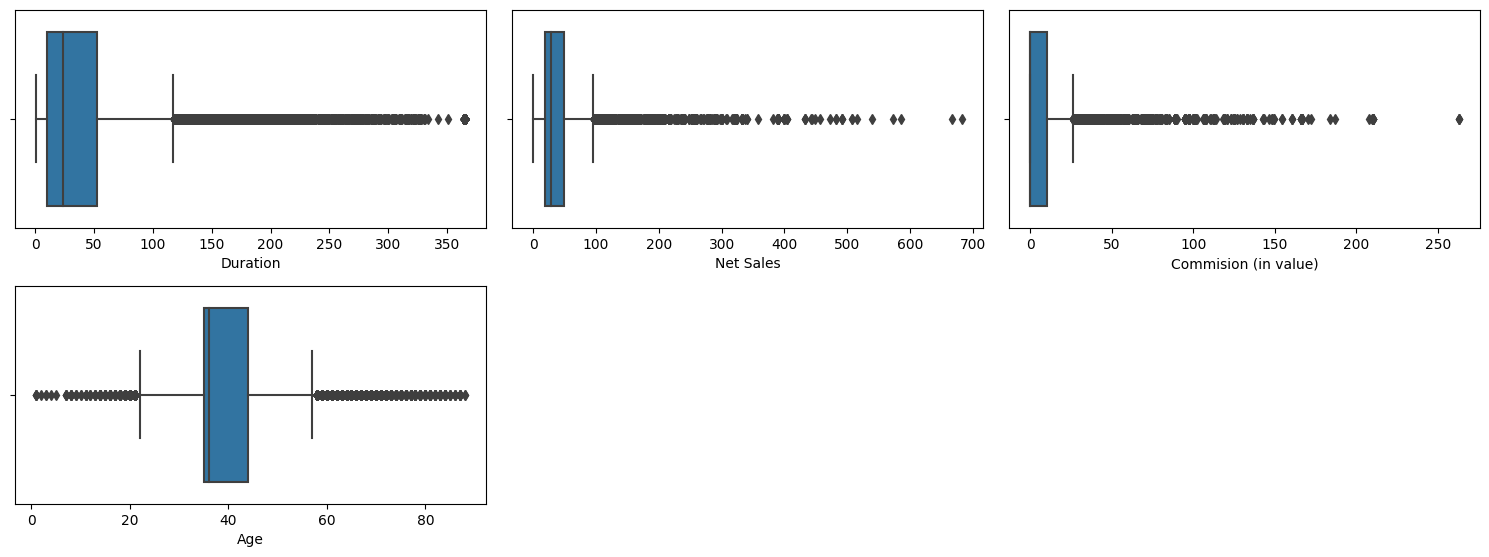

In [36]:
plt.figure(figsize=(15,8))

plotnumber = 1
for kolom in df.describe().columns:

    plt.subplot(3,3, plotnumber)
    sns.boxplot(data=df, x=kolom)

    plotnumber += 1
    
plt.tight_layout()

Kolom numerik mempunyai beberapa outliers. Penanganan yang harus dilakukan adalah melakukan scaling terhadap kolom numerik tersebut nantinya

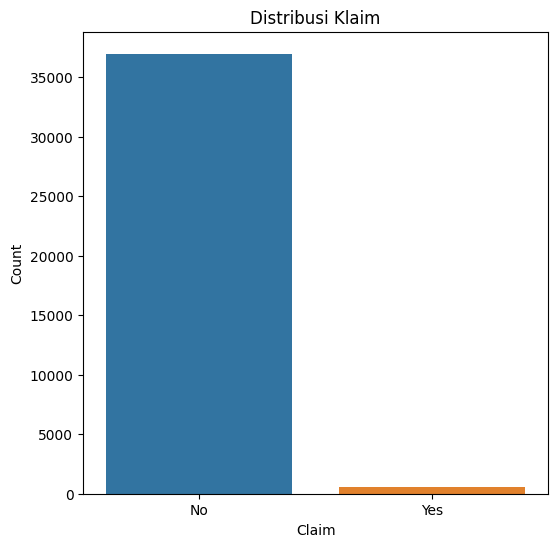

In [37]:
claim_counts = df['Claim'].value_counts()

# Membuat bar chart
plt.figure(figsize=(6, 6))
sns.barplot(x=claim_counts.index, y=claim_counts.values)

# Memberikan label pada sumbu X dan Y
plt.xlabel('Claim')
plt.ylabel('Count')

# Memberikan judul pada bar chart
plt.title('Distribusi Klaim')

# Menampilkan bar chart
plt.show()

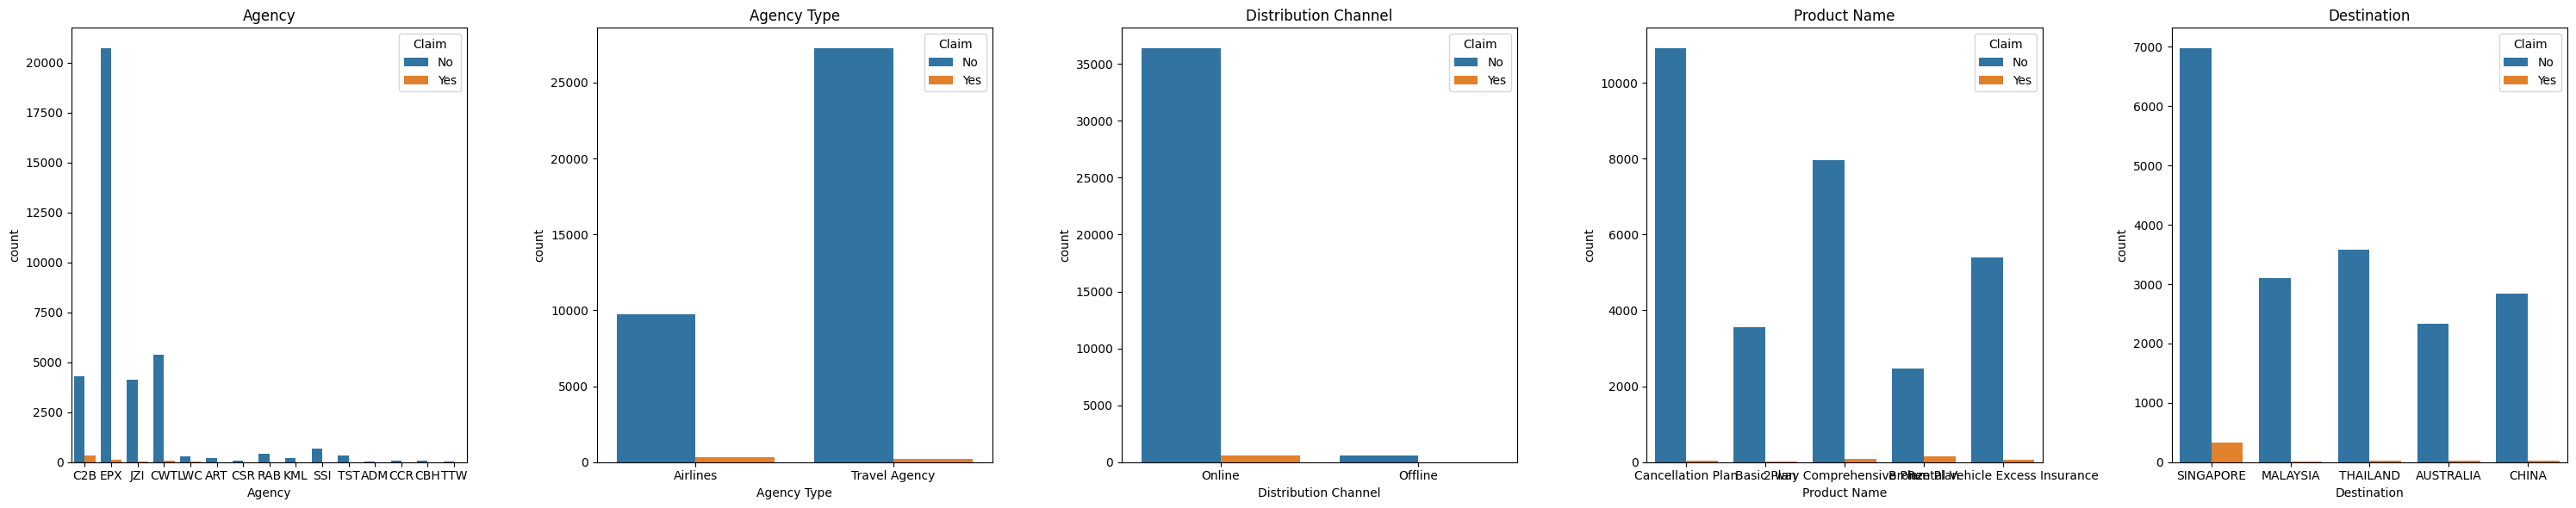

In [38]:
# Mengambil kolom kategorikal kecuali kolom 'Claim'
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Claim')

# Menghitung jumlah count plot yang diperlukan
num_plots = len(categorical_cols)

# Mengatur ukuran figure dan axes sesuai dengan jumlah count plot
fig, ax = plt.subplots(figsize=(6*num_plots, 6), ncols=num_plots)

# Menggambar count plot untuk setiap kolom kategorikal
for i, col in enumerate(categorical_cols):
    if col == 'Product Name':
        top_values = df[col].value_counts().nlargest(5).index.tolist()
        sns.countplot(x=col, hue='Claim', data=df[df[col].isin(top_values)], ax=ax[i])
    elif col == 'Destination':
        top_values = df[col].value_counts().nlargest(5).index.tolist()
        sns.countplot(x=col, hue='Claim', data=df[df[col].isin(top_values)], ax=ax[i])
    else:
        sns.countplot(x=col, hue='Claim', data=df, ax=ax[i])
    ax[i].set_title(col)

# Menampilkan plot
plt.tight_layout()
plt.show()

Dari Grafik diatas dapat disimpulkan bahwa data terdistribusi tidak normal atau terdapat `imbalance ` terhadap keseluruhan data. Dapat dilihat dari semua kolom kategorikal bahwa data lebih di dominasi tidak claim 

C:\Users\damar\AppData\Local\Temp\ipykernel_34108\1288567638.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


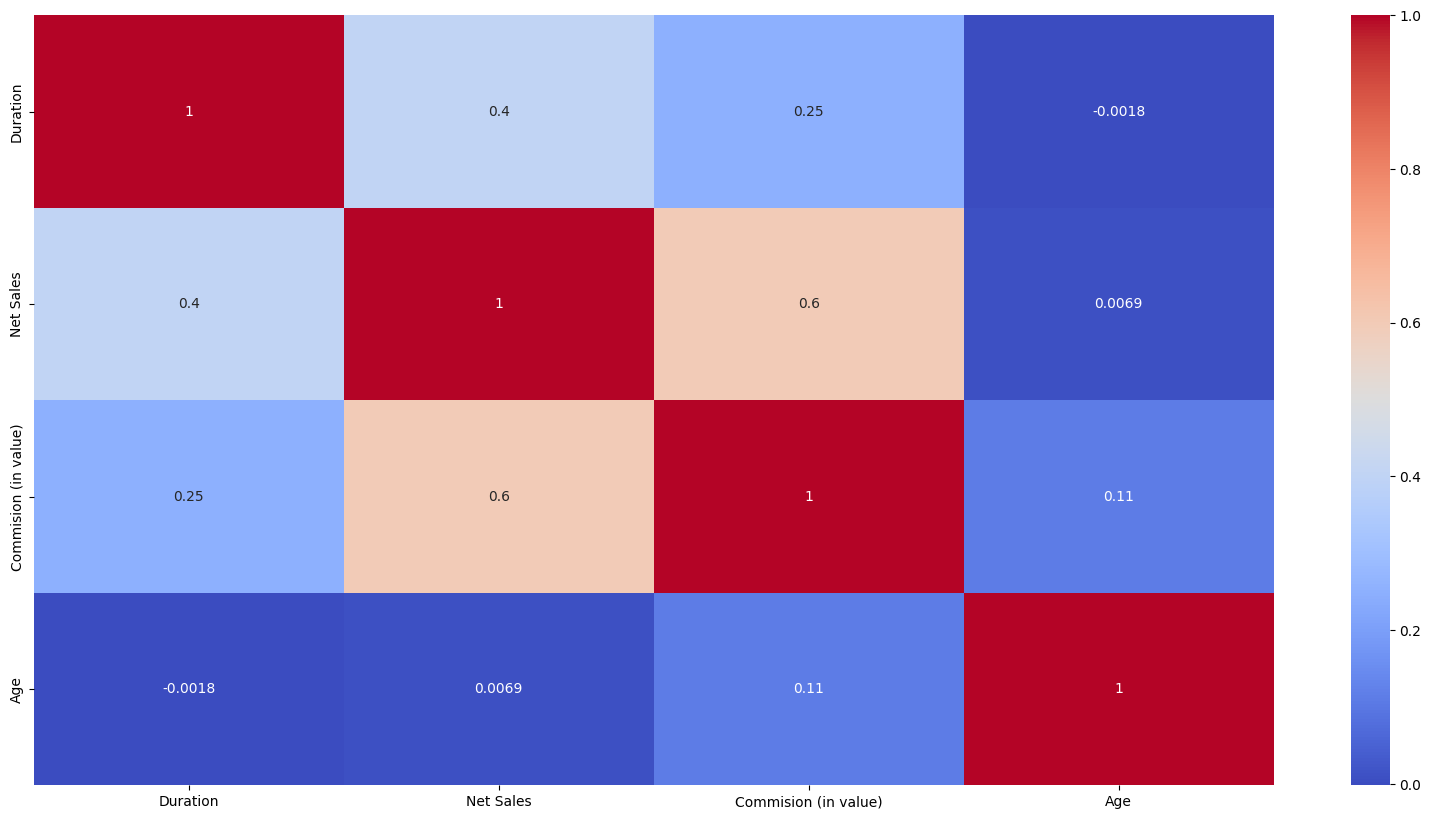

In [39]:
cor = df.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(cor, annot=True, ax=ax, cmap='coolwarm');

Dari Heatmap numerical kolom diatas kolom Commision dan Net Sales merupakan persentase yang diambil oleh perusahaan dari penjualan bersih. Dan kolom lain tidak terlalu mempunyai korelasi yang berarti jadi kita bisa ambil kesimpulan bahwa semua kolom numerical bisa kita masukkan ke dalam model

# **DATA PREPROCESSING**

Sebelum kita melakukan splitting kita harus mengubah target variable `Claim` ke dalam bentuk numerical agar mempermudah untuk proses modeling nantinya

In [40]:
df['Claim'] = np.where(df['Claim'] == 'Yes', 1, 0)
df['Claim'].value_counts()

0    36969
1      575
Name: Claim, dtype: int64

Selanjutnya kita akan melakukan splitting target terhadap target variable dan melakukan pemisahan antara target variable dan juga feature. Dan kita juga akan melakukan train test split

In [41]:
X = df.drop(columns='Claim')
y = df['Claim']

Berikut penjelasan parameter dari proses splitting :

- test_size: Ukuran subset test yang ingin dibentuk. Nilai ini dapat diberikan dalam bentuk proporsi (misalnya, 0.2 untuk 20% dari data menjadi subset test)
- random_state: Digunakan untuk mengontrol pembagian data secara acak. Saat nilai random_state tetap sama, pembagian data acak akan konsisten setiap kali kode dieksekusi. Ini berguna untuk memastikan hasil yang dapat direproduksi.
- stratify: Parameter ini digunakan untuk melakukan stratifikasi pada data berdasarkan variabel target (y). Stratifikasi memastikan bahwa proporsi kelas dalam subset train dan test tetap seimbang. Dalam contoh di atas, stratifikasi akan dilakukan berdasarkan variabel y.

In [42]:
X_train, X_test, y_train, y_test =train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

Disini saya membuat variable baru pada transform data dengan memasukkan feature numerik dan kategorikal agar iterasi dalam proses transforming lebih mudah dibaca

In [43]:
OneHotEnc = ['Agency Type','Distribution Channel']
BinaryEnc = ['Agency', 'Product Name','Destination']
NumVar = ['Net Sales', 'Age', 'Duration', 'Commision (in value)']

Selanjutnya saya melakukan scaling dan encoding pada kolom numeric dan kategorikal. Berikut penjelasannya :

- One-Hot Encoding (OneHotEncoder): One-Hot Encoding digunakan untuk mengubah variabel kategorikal menjadi representasi biner yang dapat digunakan dalam pemodelan. Dalam kasus ini, kolom-kolom 'Agency Type' dan 'Distribution Channel' akan diubah menggunakan One-Hot Encoding karena kolom mempunyai unique value yang tidak terlalu banyak.

- Binary Encoding (BinaryEncoder): Binary Encoding juga digunakan untuk mengubah variabel kategorikal menjadi representasi biner, namun menggunakan encoding biner yang lebih efisien. Dalam kasus ini, kolom-kolom 'Agency', 'Product Name', dan 'Destination' akan diubah menggunakan Binary Encoding karena kolom mempunyai unique value yang cukup banyak.

- Scaling Numerik (RobustScaler): Skala numerik digunakan untuk mengubah skala variabel numerik agar memiliki rentang yang serupa. Dalam kasus ini, kolom-kolom 'Net Sales', 'Age', 'Duration', dan 'Commision (in value)' akan diubah menggunakan Robust Scaler. Scaling ini sangat cocok mengingat Robust Scaler mempunyai karakteristik yang tahan terhadap outliers.

ColumnTransformer mengharapkan daftar transformer yang akan diterapkan beserta nama kolom yang akan di-transform. Kemudian, argumen remainder='passthrough' menunjukkan bahwa kolom-kolom yang tidak diterapkan transformasi akan dilewatkan tanpa perubahan.

In [44]:
transformer = ColumnTransformer([
    ('OneHotEnc',OneHotEncoder(),OneHotEnc),
    ('BinaryEnc',BinaryEncoder(),BinaryEnc),
    ('NumVar',RobustScaler(),NumVar)
],remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHotEnc', OneHotEncoder(),
                                 ['Agency Type', 'Distribution Channel']),
                                ('BinaryEnc', BinaryEncoder(),
                                 ['Agency', 'Product Name', 'Destination']),
                                ('NumVar', RobustScaler(),
                                 ['Net Sales', 'Age', 'Duration',
                                  'Commision (in value)'])])

Selanjutnya kita akan melihat hasil dari data yang sudah kita transformasi diatas. Terlihat bahwa kolom sudah di transformasi dengan baik

In [45]:
testing = pd.DataFrame(transformer.fit_transform(X_train),columns=transformer.get_feature_names_out())
testing.head()

,OneHotEnc__Agency Type_Airlines,OneHotEnc__Agency Type_Travel Agency,OneHotEnc__Distribution Channel_Offline,OneHotEnc__Distribution Channel_Online,BinaryEnc__Agency_0,BinaryEnc__Agency_1,BinaryEnc__Agency_2,BinaryEnc__Agency_3,BinaryEnc__Product Name_0,BinaryEnc__Product Name_1,...,BinaryEnc__Destination_2,BinaryEnc__Destination_3,BinaryEnc__Destination_4,BinaryEnc__Destination_5,BinaryEnc__Destination_6,BinaryEnc__Destination_7,NumVar__Net Sales,NumVar__Age,NumVar__Duration,NumVar__Commision (in value)
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.396040,-0.222222,-0.418605,0.380952
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.716172,1.333333,1.651163,0.000000
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,-0.597360,2.444444,-0.302326,0.565714
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.709571,-0.555556,0.139535,2.828571
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.643564,-0.777778,-0.255814,1.131429


# **MODELING**

Selanjutnya kita akan membuat variable baru dengan memasukkan model, metric dan resampler. Hal ini untuk mempermudah pembuatan kode untuk proses cross validation nantinya.
Disini saya memasukkan 9 model diantaranya :
- Logistic Regression
- KNN Clasifier
- Decision Tree Classifier
- Bagging Classifier
- Random Forest Classifier
- Ada Boost Classifier
- Gradient Boosting Classifier
- XGB Classifier
- LGBM Classifier

Model

In [46]:
logreg = LogisticRegression(random_state=42, max_iter=10000)
knn = KNeighborsClassifier(n_neighbors=5)
tree = DecisionTreeClassifier(random_state=42)
bagging = BaggingClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
adaboost = AdaBoostClassifier(random_state=42)
gboost = GradientBoostingClassifier(random_state=42)
xgboost = XGBClassifier(random_state=42)
lgbm = lgb.LGBMClassifier(random_state=42)

Metric

In [47]:
f2 = make_scorer(fbeta_score,beta=2)

Resampler

Untuk metode resampler nya saya menggunakan SMOTE untuk hasil Oversampler dan NearMiss untuk hasil Undersampler. Sebenarnya ada metode resampler lain seperti RandomOverSampler dan RandomUnderSampler. Tetapi karena data kita imbalance maka resampler yang tepat digunakan adalah SMOTE dan NearMiss. Karena metode tersebut mempelajari track record data yang sudah ada sebelumnya untuk dijadikan sampling sedangkan Untuk Random Over dan Under Sampler membuat sampling tanpa mempertimbangkan struktur dan distribusi data asli

In [48]:
smote = SMOTE(random_state=42)
near = NearMiss()

In [49]:
ListResample = [smote,near]
ListModel = [logreg,knn,tree,bagging,random_forest,adaboost,gboost,xgboost,lgbm]

# **CROSS VALIDATION**

Disini akan dilakukan proses cross validation dimana kita mencoba menampilkan hasil model terbaik dengan menggabungkan semua model dan teknik resampling.  Ini akan memberikan kita gambaran tentang kombinasi terbaik yang menghasilkan kinerja tertinggi berdasarkan metrik evaluasi yang digunakan

In [50]:
resampleCV = []
rata2CV = []
stdCV = []
allCV = []
modelCV = []


for resample in ListResample:
    for model in ListModel:
        
        model_pipe = Pipeline([
            ('prep',transformer), 
            ('resampling',resample),
            ('model', model)])
        
        model_cv = cross_val_score(
            estimator = model_pipe, 
            X = X_train, 
            y = y_train, 
            cv = 5, 
            scoring = f2,
            error_score='raise'
            )
        
        resampleCV.append(resample)
        modelCV.append(model)
        rata2CV.append(model_cv.mean())
        stdCV.append(model_cv.std())
        allCV.append(model_cv.round(4))

In [51]:
df_cv = pd.DataFrame({
    'model': modelCV,
    'resampling': resampleCV,
    'mean': rata2CV,
    'std': stdCV,
    'all': allCV
})

df_cv.sort_values('mean',ascending=False).head(10)

,model,resampling,mean,std,all
5,AdaBoostClassifier(random_state=42),SMOTE(random_state=42),0.226276,0.010114,"[0.2236, 0.231, 0.2301, 0.2083, 0.2383]"
6,GradientBoostingClassifier(random_state=42),SMOTE(random_state=42),0.225354,0.021794,"[0.2514, 0.2103, 0.2033, 0.2094, 0.2524]"
0,"LogisticRegression(max_iter=10000, random_stat...",SMOTE(random_state=42),0.190663,0.012578,"[0.1941, 0.2023, 0.1787, 0.1734, 0.2049]"
8,LGBMClassifier(random_state=42),SMOTE(random_state=42),0.169355,0.037775,"[0.2242, 0.1205, 0.1926, 0.1743, 0.1351]"
1,KNeighborsClassifier(),SMOTE(random_state=42),0.157023,0.016100,"[0.1878, 0.1582, 0.148, 0.1444, 0.1468]"
7,"XGBClassifier(base_score=None, booster=None, c...",SMOTE(random_state=42),0.101401,0.026235,"[0.1521, 0.0813, 0.1012, 0.0867, 0.0857]"
4,RandomForestClassifier(random_state=42),SMOTE(random_state=42),0.089259,0.013856,"[0.113, 0.0935, 0.0881, 0.0727, 0.0791]"
2,DecisionTreeClassifier(random_state=42),SMOTE(random_state=42),0.087487,0.015313,"[0.102, 0.0602, 0.0996, 0.0937, 0.0818]"
3,BaggingClassifier(random_state=42),SMOTE(random_state=42),0.072108,0.014800,"[0.07, 0.0682, 0.0611, 0.1007, 0.0605]"
12,BaggingClassifier(random_state=42),NearMiss(),0.069111,0.003904,"[0.0696, 0.071, 0.0751, 0.064, 0.0659]"


In [53]:
best_model_idx = df_cv['mean'].idxmax()
best_model_algo = df_cv.loc[best_model_idx, 'model']
best_model_resamp = df_cv.loc[best_model_idx, 'resampling']

best_model = Pipeline([
    ('prep', transformer),
    ('resampling', best_model_resamp),
    ('model', best_model_algo)
])

# Fit the best model on the entire training data
best_model.fit(X_train, y_train)

print("Best Model:")
print(best_model)

Best Model:
Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEnc', OneHotEncoder(),
                                                  ['Agency Type',
                                                   'Distribution Channel']),
                                                 ('BinaryEnc', BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination']),
                                                 ('NumVar', RobustScaler(),
                                                  ['Net Sales', 'Age',
                                                   'Duration',
                                                   'Commision (in value)'])])),
                ('resampling', SMOTE(random_state=42)),
                ('model', AdaBoostClassifier(random_state=42))])


Berdasarkan hasil cross-validation, model dengan skor rata-rata tertinggi adalah AdaBoostClassifier dengan teknik resampling SMOTE, yang memiliki skor rata-rata sebesar 0.226276 dan standar deviasi sebesar 0.010114. Ini menunjukkan kinerja model yang cukup baik dalam mengklasifikasikan data.

# **HYPERPARAMETER TUNING**

BEST MODEL TEST

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.1, 0.5, 1.0]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=best_model,
    param_grid=param_grid,
    scoring= f2,
    cv=5,
    n_jobs=-1
)

# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best model with the tuned hyperparameters
best_model_tuned = grid_search.best_estimator_

# Fit the best tuned model on the entire training data
best_model_tuned.fit(X_train, y_train)

# Perform predictions on the test data using the tuned model
y_pred_tuned = best_model_tuned.predict(X_test)

# Evaluate the performance of the tuned model
f2_score_tuned_best_model = fbeta_score(y_test, y_pred_tuned, beta=2)

print("Tuned Model F2 Score on Test Data:", f2_score_tuned_best_model)

Tuned Model F2 Score on Test Data: 0.19696969696969696


In [ ]:
df_best_models = pd.DataFrame({
    'Model': ['Model sebelum Tuning', 'Model setelah Tuning'],
    'F2 score': [df_cv.loc[best_model_idx, 'mean'], f2_score_tuned_best_model],
})

df_best_models

,Model,F2 score
0,Model sebelum Tuning,0.226276
1,Model setelah Tuning,0.196970


Berdasarkan hasil evaluasi, kita dapat membuat kesimpulan sebagai berikut:

- Model sebelum Tuning:
Model sebelum tuning memiliki F2 score sebesar 0.226276. Ini menunjukkan bahwa model tersebut dapat menghasilkan prediksi yang baik dengan mempertimbangkan kedua metrik recall dan presisi, dengan penekanan yang lebih kuat pada recall.

- Model setelah Tuning:
Setelah melalui proses tuning menggunakan GridSearchCV, model yang telah dituned memiliki F2 score sebesar 0.196970. Dalam hal ini, terjadi penurunan F2 score setelah tuning, yang menunjukkan bahwa performa model telah menurun setelah proses tuning.

Kesimpulannya, model sebelum tuning memiliki performa yang lebih baik dalam hal mempertimbangkan kedua metrik recall dan presisi (dengan penekanan pada recall) dibandingkan dengan model setelah tuning. Maka dari itu kita bisa gunakan model yang sebelum tuning

# **FEATURE IMPORTANCE**

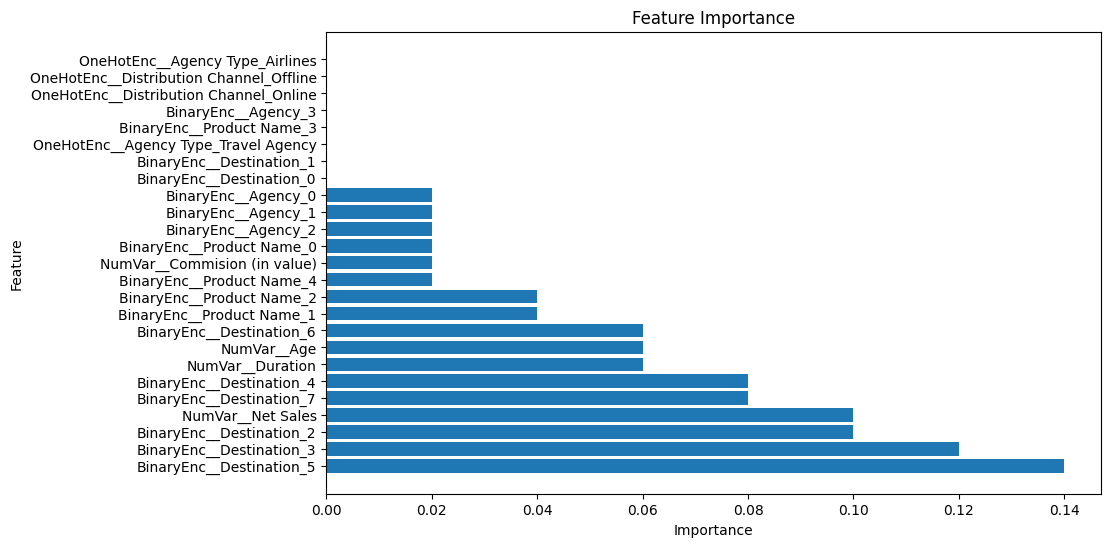

                                    Feature  Importance
18                 BinaryEnc__Destination_5        0.14
16                 BinaryEnc__Destination_3        0.12
15                 BinaryEnc__Destination_2        0.10
21                        NumVar__Net Sales        0.10
20                 BinaryEnc__Destination_7        0.08
17                 BinaryEnc__Destination_4        0.08
23                         NumVar__Duration        0.06
22                              NumVar__Age        0.06
19                 BinaryEnc__Destination_6        0.06
9                 BinaryEnc__Product Name_1        0.04
10                BinaryEnc__Product Name_2        0.04
12                BinaryEnc__Product Name_4        0.02
24             NumVar__Commision (in value)        0.02
8                 BinaryEnc__Product Name_0        0.02
6                       BinaryEnc__Agency_2        0.02
5                       BinaryEnc__Agency_1        0.02
4                       BinaryEnc__Agency_0     

In [ ]:
importance = best_model.named_steps['model'].feature_importances_
feature_names = testing.columns  

# Membuat DataFrame untuk menyimpan feature importance
df_feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

# Sorting berdasarkan nilai importance secara menurun
df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)

# Visualisasi feature importance
plt.figure(figsize=(10, 6))
plt.barh(df_feature_importance['Feature'], df_feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Menampilkan DataFrame feature importance
print(df_feature_importance)


Berdasarkan hasil feature importance yang telah dihitung, kita dapat mengambil beberapa kesimpulan:

Fitur-fitur dengan nilai importance yang tinggi, yaitu di atas 0.10, adalah:

- BinaryEnc__Destination_5: 0.14
- BinaryEnc__Destination_3: 0.12
- BinaryEnc__Destination_2: 0.10
- NumVar__Net Sales: 0.10

Fitur-fitur dengan nilai importance yang cukup signifikan, yaitu antara 0.06 hingga 0.08, adalah:
- BinaryEnc__Destination_7: 0.08
- BinaryEnc__Destination_4: 0.08
- NumVar__Duration: 0.06
- NumVar__Age: 0.06
- BinaryEnc__Destination_6: 0.06

Fitur-fitur dengan nilai importance yang lebih rendah, yaitu di bawah 0.06, memberikan kontribusi yang relatif lebih kecil terhadap prediksi model.

Beberapa fitur, seperti BinaryEnc__Product Name_X (dengan X adalah angka 0-4), BinaryEnc__Agency_X, dan beberapa fitur lainnya, memiliki nilai importance yang cukup rendah atau bahkan nol. Hal ini menunjukkan bahwa fitur-fitur tersebut tidak memiliki pengaruh signifikan terhadap model. Maka dari hasil Future Importance terlihat bahwa kolom Destinasi dan juga Net sales dapat mempengaruhi performa model dalam memprediksi

# **CONCLUSION**

In [ ]:
y_pred_before_tuning = best_model.predict(X_test)

classification_report_before_tuning = classification_report(y_test, y_pred_before_tuning)
print("Classification Report Model Sebelum Tuning:")
print(classification_report_before_tuning)

Classification Report Model Sebelum Tuning:
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      7394
           1       0.06      0.52      0.11       115

    accuracy                           0.87      7509
   macro avg       0.53      0.70      0.52      7509
weighted avg       0.98      0.87      0.92      7509



Berdasarkan hasil classification report, model yang dibuat memiliki kemampuan untuk mengidentifikasi sekitar 87% dari total pelanggan yang sebenarnya tidak akan mengajukan klaim asuransi dan 52% dari total pelanggan yang sebenarnya akan mengajukan klaim asuransi. Artinya, model dapat membantu perusahaan travel insurance dalam menghindari pengeluaran yang tidak perlu dengan mengidentifikasi pelanggan yang cenderung tidak akan mengajukan klaim.

In [ ]:
proporsi_claimed = df['Claim'].value_counts(normalize=True)['Yes'] * 100
proporsi_not_claimed = 100 - proporsi_claimed

print("Proporsi Total Claimed: {:.2f}%".format(proporsi_claimed))
print("Proporsi Total Not Claimed: {:.2f}%".format(proporsi_not_claimed))

Proporsi Total Claimed: 1.53%
Proporsi Total Not Claimed: 98.47%


Untuk membuat contoh yang lebih relevan, mari kita gunakan parameter yang berikut:

- Harga Premi = $20
- Biaya Klaim = $600
- Jumlah Pelanggan yang Memiliki Polis = 4000

Tanpa menggunakan model:

- Total Premi: 4000 x 20 = $80,000 
- Total Pelanggan aktual tidak klaim: 3938 orang (98.47% dari 4000 orang)
- Total Pelanggan aktual yang klaim: 61 orang (1.53% dari 4000 orang)
- Total keuntungan: 3938 x 20 - 61 x 600 = 78,760 - 36,600 = $42,160

Dengan menggunakan model:

- Jumlah yang aktualnya tidak klaim dan prediksi tidak klaim = 3910 orang
- Jumlah yang aktualnya tidak klaim tapi prediksi claim = 90 orang
- Jumlah Pelanggan yang benar diprediksi akan klaim: 40 orang
- Jumlah Pelanggan yang gagal diprediksi akan klaim: 60 orang
- Jumlah keuntungan: (3910 x 20) - (90 x 20) - (40 x 600) = 78,200 - 1,800 - 24,000 = $52,400

Dalam contoh ini, perusahaan dapat memprediksi 40 orang yang akan claim dari total 4000 pelanggan. Maka perusahaan mengalami kenaikan keuntungan sebesar $10,240 dengan model tersebut karena mengetahui bahwa 40 orang tersebut akan claim dan tidak menawarkan premi kepada mereka. Namun, model masih gagal memprediksi 60 orang yang sebenarnya akan claim tapi diprediksi tidak akan claim.

# **RECOMENDATION**

Rekomendasi dari pembuatan model agar lebih baik :

* Melakukan penambahan teknik sampling selain SMOTE dan NearMiss. Seperti contoh ADASYN dan BorderlineSMOTE untuk oversampling dan TomekLinks dan EditedNearestNeighbours untuk undersampling
* Melakukan Evaluasi Terhadap Metrik Lain, Selain menggunakan F2-score sebagai metrik evaluasi, Anda juga dapat mempertimbangkan metrik lain seperti Area Under the Precision-Recall Curve (AUC-PRC) atau Receiver Operating Characteristic (ROC) untuk mendapatkan gambaran yang lebih lengkap tentang kinerja model.
* Menggunakan Data yang Lebih Bervariasi: Jika memungkinkan, usahakan untuk mengumpulkan lebih banyak data yang mencakup variasi yang lebih luas dalam atribut dan karakteristik pelanggan. Data yang lebih bervariasi dapat membantu model dalam mengenali pola yang lebih kompleks dan meningkatkan kemampuan prediksi.
* Mencoba Model lain dan Melakukan Hyperparameter Tuning lebih lanjut untuk mendapatkan hasil yang lebih optimal